<a href="https://colab.research.google.com/github/VictorMercier/Track-Data-Science/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression Introduction

Linear regression looks at the relationship between the data you have and the data you want to predict.

Linear Regression is a basic and commonly used type of predictive analysis. It’s the most widely used of all statistical techniques. It quantifies the relationship between one or more predictor variables and one outcome variable.

Linear regression models are used to show (or predict) the relationship between two variables or factors. Regression analysis is commonly used to show the correlation between two variables.


In [531]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [532]:
# J'ai importé un excel que j'ai créer depuis des données de Yahoo Finance 
data = pd.read_excel(r"OilShell.xlsx")   
data 

,Date,Oil Closing Price,Close
0,2010-11-15,81.510002,64.599998
1,2010-11-22,83.760002,61.610001
2,2010-11-29,89.190002,63.549999
3,2010-12-06,87.790001,64.720001
4,2010-12-13,88.019997,64.419998
...,...,...,...
518,2020-10-19,39.849998,24.360001
519,2020-10-26,35.790001,24.150000
520,2020-11-02,37.139999,25.320000
521,2020-11-09,40.130001,29.389999


In [533]:
# Ici je change la colonne Index tout à gauche par les dates pour une meilleure lisibitité du tableau
data.index = pd.to_datetime(data["Date"])

# Avec la fonction .drop() je retire la colonne date du tableau vu qu'elle est en index. 
data = data.drop('Date', axis=1)
data

,Oil Closing Price,Close
Date,,
2010-11-15,81.510002,64.599998
2010-11-22,83.760002,61.610001
2010-11-29,89.190002,63.549999
2010-12-06,87.790001,64.720001
2010-12-13,88.019997,64.419998
...,...,...
2020-10-19,39.849998,24.360001
2020-10-26,35.790001,24.150000
2020-11-02,37.139999,25.320000


In [534]:
data = data.rename(columns={"Close" : "Royal Dutch Shell Closing Price"})
data 

,Oil Closing Price,Royal Dutch Shell Closing Price
Date,,
2010-11-15,81.510002,64.599998
2010-11-22,83.760002,61.610001
2010-11-29,89.190002,63.549999
2010-12-06,87.790001,64.720001
2010-12-13,88.019997,64.419998
...,...,...
2020-10-19,39.849998,24.360001
2020-10-26,35.790001,24.150000
2020-11-02,37.139999,25.320000


In [535]:
# Je vérifie s'il y a des cases vides (i.e avec des NA ou NaN), on peut retirer le display
display(data.isna().any())

# Si j'ai True, je vais les enlever avec la fonction .dropna()
data = data.dropna()
data

Oil Closing Price                  False
Royal Dutch Shell Closing Price    False
dtype: bool

,Oil Closing Price,Royal Dutch Shell Closing Price
Date,,
2010-11-15,81.510002,64.599998
2010-11-22,83.760002,61.610001
2010-11-29,89.190002,63.549999
2010-12-06,87.790001,64.720001
2010-12-13,88.019997,64.419998
...,...,...
2020-10-19,39.849998,24.360001
2020-10-26,35.790001,24.150000
2020-11-02,37.139999,25.320000


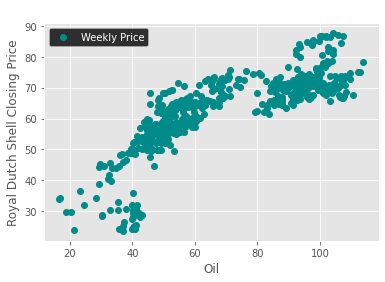

In [536]:
# Je définis mes axes x et y 
x = data["Oil Closing Price"]
y = data["Royal Dutch Shell Closing Price"]

# 1er graph simple sous forme de rond, d'où le "o" qui indique le format, "cercles". 
plt.plot(x, y, "o", color = "darkcyan", label = "Weekly Price")
plt.title("Royal Dutch Shell Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Royal Dutch Shell Closing Price")
plt.style.use('dark_background')
plt.legend()
plt.show()

In [537]:
#mesurer la corrélation
data.corr()

,Oil Closing Price,Royal Dutch Shell Closing Price
Oil Closing Price,1.000000,0.803788
Royal Dutch Shell Closing Price,0.803788,1.000000


### **Strong relationship as r > 0.8**
*   Very strong relationship (|r|>0.8 =>)
*   Strong relationship (0.6≤|r|)
*   Moderate relationship (0.4≤|r|)
*   Weak relationship (0.2≤|r|)
*  Very weak relationship (|r|)

In [538]:
#juste avoir la description des données

data.describe()

,Oil Closing Price,Royal Dutch Shell Closing Price
count,523.000000,523.000000
mean,68.933690,62.398222
std,23.967035,12.743523
min,16.559999,23.650000
25%,48.930000,56.180000
50%,61.660000,64.919998
75%,93.384998,70.890000
max,113.930000,87.599998


75% des valeurs sont comprises entre mean - std < mean < mean + std, soit 45 < 68 < 92.8 **donc faible dispersion des valeurs**

## Cheking for Outliers and Skewness

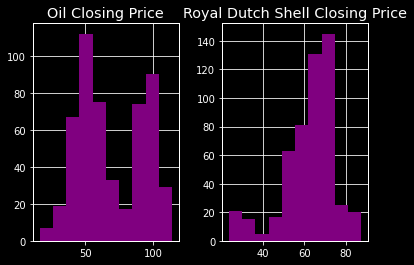

In [539]:
data.hist(grid=True, color = "purple")
plt.style.use('dark_background')

Looks like normal distribution so it seems that is not a lot of outliers. **However it looks like Royal Dutch Shell seems a little bit negative skewed.** Therefore, on average, Royal Dutch Sheel Closing Price are below the mean.

##Calculate kurtosis and skewness

In [540]:
from scipy import stats
from scipy.stats import kurtosis, skew

In [541]:
#je calcule l'excès kurtosis en utilisant la méthode fisher. L'alternative c'est Pearson mais anyway. Kurtosis (with fisher) doit être proche de 0, sous Person proche de 3.
Oil_kurtosis = kurtosis(data["Oil Closing Price"], fisher= True)
royal_kurtosis = kurtosis(data["Royal Dutch Shell Closing Price"], fisher = True)

#je calcule le skewness
royal_skew = skew(data["Royal Dutch Shell Closing Price"])
Oil_skew = skew(data["Oil Closing Price"])

display('Royal Dutch Shell Kurtosis: {:2}'.format(royal_kurtosis))
display('Oil Kurtosis: {:2}'.format(Oil_kurtosis))

display('Royal Dutch Shell Skew: {:2}'.format(royal_skew))
display('Oil Skew: {:2}'.format(Oil_skew))

'Royal Dutch Shell Kurtosis: 1.2251095754809818'

'Oil Kurtosis: -1.3277406324528571'

'Royal Dutch Shell Skew: -1.0449023389186745'

'Oil Skew: 0.14989836772596657'

**Interpretation**

Skewness represents the concentration of values below or above the average. 
Kurtosis makes it possible to realize the importance of extreme values.

Excess kurtosis compares the kurtosis coefficient with that of a normal distribution. In other words, it measures the tailedness and peakedness compared to a normal distribution. The bigger the tail the larger the excess of kurtosis, or outliers.
Here we can see that both Royal Dutch Shell Kurtosis and and Oil Kurtosis have kurtosis smaller than 3. It means that the distributions have lighter tails than the normal distribution. In other words there are not a lot of extreme values.

Concerning the skewness of Royal Dutch Shell, it is a bit negatively skewed which means that quite of the values are below the mean.

On the whole, there is not extreme value

#Shape of the kurtosis

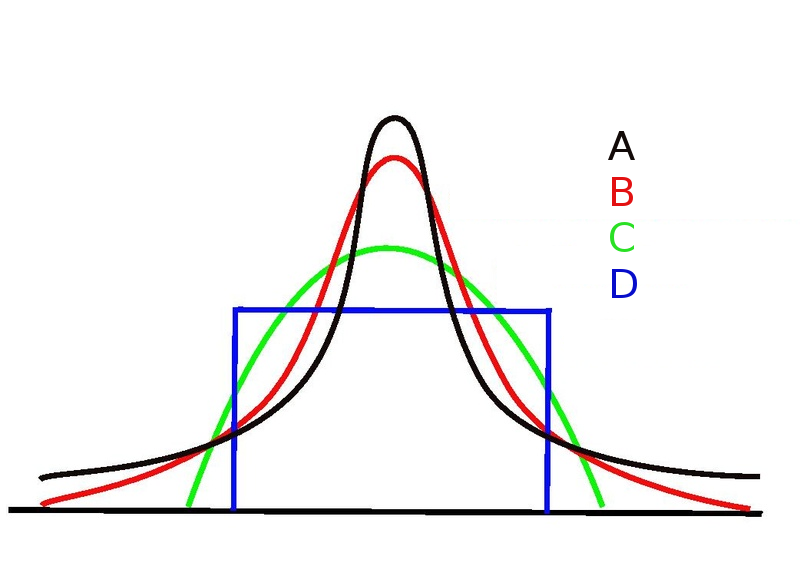


### Kurtosis


* Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution 

* Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader. --> more flat-topped distributions

* Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper. --> less flat-topped distributions

### Skewness

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

#Building the slope

0.42738247018244646
32.93717103811879


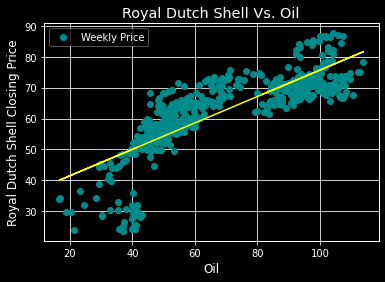

In [542]:
plt.plot(x, y, 'o', color = "darkcyan", label = "Weekly Price")
a, b = np.polyfit(x, y, 1) #facteur de la slope, b the intercept so that we get the folowing equation y =ax + b
print(a)
print(b)
plt.title("Royal Dutch Shell Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Royal Dutch Shell Closing Price")
plt.style.use('dark_background')
plt.legend()
plt.plot(x, a*x + b, color = "yellow")

About the np.polyfit: 
It is a pretty general least squares polynomial fit function which accepts the data set and a polynomial function of any degree (specified by the user), and returns a vector of coefficients p that minimises the squared error.

The np.polyfit() function is an easy way to perfom a polynomial function as mentioned before. 
However, what we want to be able to do with our linear regression model is to be able to predict future values. In fact, we want to see here if exxon's stock price is correlated to the oil stock price. 
In other word, if the oil stock price increases, does the Royal Ducth Shell stock price increases too ? 

#Prediction of future values

In [543]:
# As we  want to see if the stock price of exxon is correlated to the oil stock price 
# We will then have X (input) equal to oil price and Y (the output) equal to the Royal Dutch Shell stock price
X = data[["Oil Closing Price"]]
y = data.drop("Oil Closing Price", axis=1)

print(X)
print(y)

            Oil Closing Price
Date                         
2010-11-15          81.510002
2010-11-22          83.760002
2010-11-29          89.190002
2010-12-06          87.790001
2010-12-13          88.019997
...                       ...
2020-10-19          39.849998
2020-10-26          35.790001
2020-11-02          37.139999
2020-11-09          40.130001
2020-11-16          41.430000

[523 rows x 1 columns]
            Royal Dutch Shell Closing Price
Date                                       
2010-11-15                        64.599998
2010-11-22                        61.610001
2010-11-29                        63.549999
2010-12-06                        64.720001
2010-12-13                        64.419998
...                                     ...
2020-10-19                        24.360001
2020-10-26                        24.150000
2020-11-02                        25.320000
2020-11-09                        29.389999
2020-11-16                        32.080002

[523 rows x 1

In [544]:
# Split the data to train them and then test them
# The train size will represent 80% of our data and the test size will represent 20% of our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The reason why we have to split our data for training is simply to avoid overfitting in machine learning. 
***What is overfitting ?*** 

When the set of data you use to create your model for the linear regression fits too well your dataset, meaning that this model is too well-trained for this specific dataset, then you fell in one of the most common mistakes made by most of the beginners who start learning machine learning : **Overfitting**.

In other words, your model can not be generalized to other datasets, as it fits too well your current dataset. However, what we want is to be able to have a model trained on a set of data that could be used for other datasets. 

Therefore, in order to prevent that, we split our data with on one hand, a certain percentage of our data set (80% here) used to train the model and on the other hand, we use the 20% left to test our model and verify that we do not have an overfit model. 

In [545]:
# Now that we have our X and y, we have to create a model and fit it. 
model = LinearRegression()
model.fit(X_train, y_train)

# Now that we have our regression model, we can make some predictions: 
y_predict = model.predict(X_test)

# An example of 100th prediction:
y_predict[100]

array([45.73814624])

            Oil Closing Price
Date                         
2014-06-16         107.260002
2019-09-09          54.849998
2020-04-13          16.990000
2016-09-26          48.240002
2019-04-22          63.299999
...                       ...
2016-02-15          29.639999
2017-06-05          45.830002
2010-12-27          91.379997
2019-06-03          53.990002
2011-01-31          89.029999

[105 rows x 1 columns]
            Royal Dutch Shell Closing Price
Date                                       
2014-06-16                        86.620003
2019-09-09                        57.200001
2020-04-13                        34.430000
2016-09-26                        52.830002
2019-04-22                        64.250000
...                                     ...
2016-02-15                        45.299999
2017-06-05                        55.759998
2010-12-27                        66.669998
2019-06-03                        65.330002
2011-01-31                        69.750000

[105 rows x 1

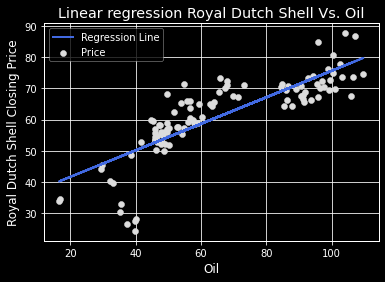

In [546]:
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 2,label ='Regression Line')
plt.title("Linear regression Royal Dutch Shell Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Royal Dutch Shell Closing Price")
plt.style.use('dark_background')
plt.legend()
print(X_test)
print(y_test)


In [547]:
print (f'coefficient ={model.coef_}')
print (f'intercept ={model.intercept_}')

coefficient =[[0.42398438]]
intercept =[33.17124975]


In [548]:
R = model.score(X_test,y_test)
R

0.6768152705248887

In [549]:
print(f'x value={X_test["Oil Closing Price"][2]}')
print(f'y predicted value={y_predict[2]}')

x value=16.99
y predicted value=[40.3747443]


**How do we know if our model is the best fit line ?** 

In general, a model fits the data well if the differences between the observed values and the model's predicted values are small and unbiased.

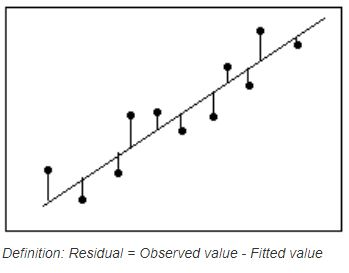

To do that, we have to compute the R squared vaue, which measures how close the data are to the fitted regression line.  It is also known as the coefficient of determination. 

R squared is the percentage of the response variable variation that is explained by a linear model. Or:

- R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.


## 3D Representation

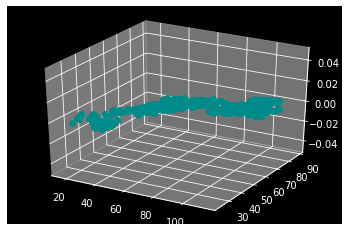

In [550]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
xline = data["Oil Closing Price"]
yline = data["Royal Dutch Shell Closing Price"]
ax.plot3D(xline, yline, 'o', color ='darkcyan')
#ax.view_init(35, 10)
plt.style.use('ggplot')

Just another way to vizualize the data even if there are only two variables :) 



# Let's try Linear Regression using Sci-kit learn 


np ver: 1.18.5


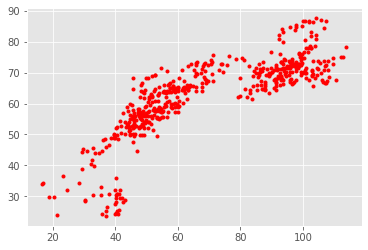

In [551]:
import matplotlib.pyplot as plt
import numpy as np
print ("np ver:",np.__version__)
X=data["Oil Closing Price"]
y = data["Royal Dutch Shell Closing Price"]
plt.plot(X,y,'r.')

plt.show()

In [552]:
X_b=np.c_[np.ones((523,1)),X]
#we need this column to include X(0)=1, to include the bias term in θ
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([32.93717104,  0.42738247])

In [553]:
X_new=np.array([[0],[120]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([32.93717104, 84.22306746])

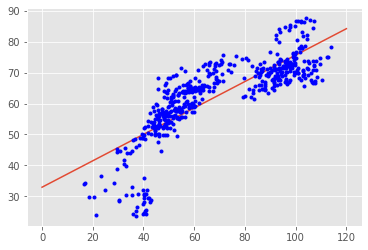

In [554]:
plt.plot(X_new,y_predict)
#since we have the prediction at the intercept and the model is linear the red line will identify each element in the interval
plt.plot(X,y,"b.")
plt.show()

In [555]:
X.shape
y.shape

(523,)

In [556]:
import sklearn
from sklearn.linear_model import LinearRegression
print (sklearn.__version__)
lin_reg=LinearRegression()
#Remember the parenthesis to recall the default constructor!
Xvec=np.array(X).reshape(-1,1)

lin_reg.fit(Xvec,y)
lin_reg.intercept_, lin_reg.coef_

0.22.2.post1


(32.93717103811879, array([0.42738247]))

In [557]:
Xvec= np.array(X).reshape(-1,1)
Xvec.shape
#that's what you need ( a column vector)

(523, 1)

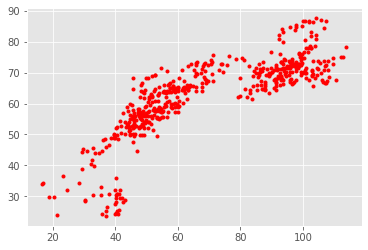

In [558]:
plt.plot(X,y,"r.")
plt.show()

In [559]:
lin_reg.predict(X_new)

array([32.93717104, 84.22306746])

In [560]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([32.93717104,  0.42738247])

In [561]:
x_2dim=np.c_[Xvec,np.ones(523)]
x_2dim.shape

(523, 2)

In [562]:
x_2dim

array([[81.510002,  1.      ],
       [83.760002,  1.      ],
       [89.190002,  1.      ],
       ...,
       [37.139999,  1.      ],
       [40.130001,  1.      ],
       [41.43    ,  1.      ]])

In [563]:
import numpy as np
import matplotlib.pyplot as plt
X= data["Oil Closing Price"]
#l=np.random.randn(5,1)
#print (l)
y=4+2*x_2dim[:,[0]]+(5*x_2dim[:,[1]])+x_2dim
print(y.shape)

(523, 2)


In [564]:
y

array([[253.530006, 173.020004],
       [260.280006, 177.520004],
       [276.570006, 188.380004],
       ...,
       [120.419997,  84.279998],
       [129.390003,  90.260002],
       [133.29    ,  92.86    ]])

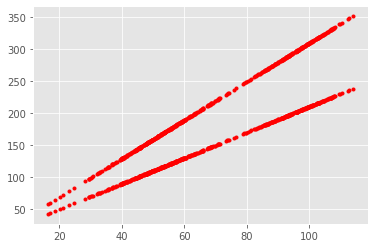

In [565]:
plt.plot(X,y,"r.")
plt.show()

In [566]:
X= np.array(X).reshape(-1,1)

In [567]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#Remember the parenthesis to recall the default constructor!
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([ 9., 10.]), array([[3.],
        [2.]]))

-----------------------------------------------------------------